In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cust= pd.read_csv('customer.csv',sep=";")
cust.head()

,Status,Status_code,Gender,Age,Payment Method,LastTransaction
0,Loyal,0,male,64,credit card,98
1,Churn,1,male,35,cheque,118
2,Loyal,0,female,25,credit card,107
3,Loyal,0,female,39,credit card,177
4,Loyal,0,male,39,credit card,90


In [ ]:
cust_data = pd.get_dummies(cust, columns = ['Gender', 'Payment Method'])
cust_data.head()

,Status,Status_code,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,Loyal,0,64,98,0,1,0,0,1
1,Churn,1,35,118,0,1,0,1,0
2,Loyal,0,25,107,1,0,0,0,1
3,Loyal,0,39,177,1,0,0,0,1
4,Loyal,0,39,90,0,1,0,0,1


In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
Status                        998 non-null object
Status_code                   998 non-null int64
Age                           998 non-null int64
LastTransaction               998 non-null int64
Gender_female                 998 non-null uint8
Gender_male                   998 non-null uint8
Payment Method_cash           998 non-null uint8
Payment Method_cheque         998 non-null uint8
Payment Method_credit card    998 non-null uint8
dtypes: int64(3), object(1), uint8(5)
memory usage: 36.2+ KB


In [ ]:
X = cust_data.iloc[:,2:9]
X.head()

,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,64,98,0,1,0,0,1
1,35,118,0,1,0,1,0
2,25,107,1,0,0,0,1
3,39,177,1,0,0,0,1
4,39,90,0,1,0,0,1


In [ ]:
Y = cust_data.loc[:,['Status_code']]
Y.head()

,Status_code
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
xtr = X_train.iloc[:,[0,1,2,4,5]]
xtr.head()

,Age,LastTransaction,Gender_female,Payment Method_cash,Payment Method_cheque
692,20,118,1,0,0
516,18,90,1,0,0
880,45,63,0,1,0
113,40,82,0,0,0
871,19,72,0,0,0


In [ ]:
X_train.head()

,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
692,20,118,1,0,0,0,1
516,18,90,1,0,0,0,1
880,45,63,0,1,1,0,0
113,40,82,0,1,0,0,1
871,19,72,0,1,0,0,1


In [ ]:
X_test

,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
270,51,142,1,0,0,0,1
725,56,100,0,1,0,0,1
31,66,168,0,1,1,0,0
342,52,161,1,0,0,0,1
604,41,85,0,1,0,0,1
...,...,...,...,...,...,...,...
935,51,54,0,1,0,0,1
622,63,116,0,1,0,0,1
255,86,97,1,0,0,0,1
272,46,50,0,1,0,0,1


In [ ]:
len(X_test)

200

#### Regresi Logistik

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
reglog = sm.Logit(Y_train,xtr).fit()

Optimization terminated successfully.
         Current function value: 0.554329
         Iterations 6


In [ ]:
print(reglog.summary())

                           Logit Regression Results                           
Dep. Variable:            Status_code   No. Observations:                  798
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.1125
Time:                        15:33:52   Log-Likelihood:                -442.35
converged:                       True   LL-Null:                       -498.45
Covariance Type:            nonrobust   LLR p-value:                 2.488e-23
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0196      0.004     -4.895      0.000      -0.027      -0.012
LastTransaction          -0.0074      0.002     -4.146      0.000      -0.011      -0.004
Gender_f

In [ ]:
yhat= reglog.predict(xtr)
yhat.tail()

835    0.076119
192    0.750756
629    0.585515
559    0.846433
684    0.093819
dtype: float64

In [ ]:
yhat_code = (yhat >= 0.5).astype(int)
yhat_code.tail()

835    0
192    1
629    1
559    1
684    0
dtype: int32

In [ ]:
xtr1 = X_train.iloc[:,[0,1,2,4,6]]
xtr1.head()

,Age,LastTransaction,Gender_female,Payment Method_cash,Payment Method_credit card
692,20,118,1,0,1
516,18,90,1,0,1
880,45,63,0,1,0
113,40,82,0,0,1
871,19,72,0,0,1


In [ ]:
reglog1 = sm.Logit(Y_train,xtr1).fit()

Optimization terminated successfully.
         Current function value: 0.472388
         Iterations 6


In [ ]:
print(reglog1.summary())

                           Logit Regression Results                           
Dep. Variable:            Status_code   No. Observations:                  798
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.2437
Time:                        15:33:53   Log-Likelihood:                -376.97
converged:                       True   LL-Null:                       -498.45
Covariance Type:            nonrobust   LLR p-value:                 2.135e-51
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                            0.0043      0.005      0.889      0.374      -0.005       0.014
LastTransaction               -0.0001      0.002     -0.074      0.941      -0.004 

In [ ]:
yhat1= reglog1.predict(xtr1)
yhat1.tail()

835    0.086992
192    0.477263
629    0.539649
559    0.706523
684    0.084072
dtype: float64

In [ ]:
yhat1_code = (yhat1 >= 0.5).astype(int)
yhat1_code.tail()

835    0
192    0
629    1
559    1
684    0
dtype: int32

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_train, yhat1_code))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       545
           1       0.64      0.68      0.66       253

    accuracy                           0.78       798
   macro avg       0.74      0.75      0.75       798
weighted avg       0.78      0.78      0.78       798



In [ ]:
xtest = X_test.iloc[:,[0,1,2,4,6]]
xtest.head()

,Age,LastTransaction,Gender_female,Payment Method_cash,Payment Method_credit card
270,51,142,1,0,1
725,56,100,0,0,1
31,66,168,0,1,0
342,52,161,1,0,1
604,41,85,0,0,1


In [ ]:
reglog_test = sm.Logit(Y_test,xtest).fit()

Optimization terminated successfully.
         Current function value: 0.473297
         Iterations 6


In [ ]:
print(reglog_test.summary())

                           Logit Regression Results                           
Dep. Variable:            Status_code   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.2690
Time:                        15:33:55   Log-Likelihood:                -94.659
converged:                       True   LL-Null:                       -129.49
Covariance Type:            nonrobust   LLR p-value:                 2.678e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                            0.0222      0.010      2.256      0.024       0.003       0.041
LastTransaction               -0.0048      0.004     -1.219      0.223      -0.012 

In [ ]:
yhat_test= reglog_test.predict(xtest)
yhat_test.tail()

935    0.093638
622    0.091214
255    0.725762
272    0.086135
484    0.091704
dtype: float64

In [ ]:
yhat_test_code = (yhat_test >= 0.5).astype(int)
yhat_test_code.tail()

935    0
622    0
255    1
272    0
484    0
dtype: int32

In [ ]:
print(classification_report(Y_test, yhat_test_code))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       130
           1       0.75      0.67      0.71        70

    accuracy                           0.81       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.80      0.81      0.80       200



#### Accuracy = 81%
#### Precision = 79%

In [ ]:
predik1 = reglog.predict(xtest)
predik1.head()

270    0.629146
725    0.213907
31     0.121370
342    0.591113
604    0.289830
dtype: float64

In [ ]:
predik1_code = (predik1 >= 0.5).astype(int)
predik1_code.head()

270    1
725    0
31     0
342    1
604    0
dtype: int32

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,Y_train)

C:\Users\admin BASE\Anaconda31\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
yhat_nb = gnb.predict(X_train)
yhat_nb

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
print(classification_report(Y_train, yhat_nb))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       545
           1       0.60      0.79      0.68       253

    accuracy                           0.77       798
   macro avg       0.74      0.78      0.75       798
weighted avg       0.80      0.77      0.77       798



In [ ]:
predik_nb = gnb.predict(X_test)

In [ ]:
predik_nb

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [ ]:
print(classification_report(Y_test, predik_nb))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       130
           1       0.63      0.83      0.72        70

    accuracy                           0.77       200
   macro avg       0.76      0.78      0.76       200
weighted avg       0.80      0.77      0.77       200



#### One Hot Encoded

In [ ]:
cust_data= pd.get_dummies(cust, columns = ['Gender', 'Payment Method'])
cust_data.head()

,Status,Status_code,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,Loyal,0,64,98,0,1,0,0,1
1,Churn,1,35,118,0,1,0,1,0
2,Loyal,0,25,107,1,0,0,0,1
3,Loyal,0,39,177,1,0,0,0,1
4,Loyal,0,39,90,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
692,20,118,1,0,0,0,1
516,18,90,1,0,0,0,1
880,45,63,0,1,1,0,0
113,40,82,0,1,0,0,1
871,19,72,0,1,0,0,1


In [ ]:
X = cust_data.iloc[:,2:9]
X.head()

,Age,LastTransaction,Gender_female,Gender_male,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,64,98,0,1,0,0,1
1,35,118,0,1,0,1,0
2,25,107,1,0,0,0,1
3,39,177,1,0,0,0,1
4,39,90,0,1,0,0,1


In [ ]:
Y = cust_data.loc[:,['Status_code']]
Y.head()

,Status_code
0,0
1,1
2,0
3,0
4,0


#### Decision Tree

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

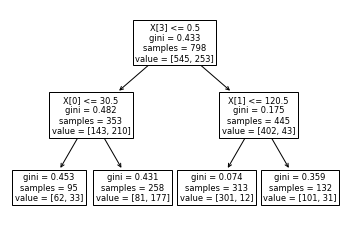

In [ ]:
tree.plot_tree(dt)
plt.show()

In [ ]:
yhat_dt = dt.predict(X_train)

In [ ]:
print(classification_report(Y_train, yhat_dt))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       545
           1       0.69      0.70      0.69       253

    accuracy                           0.80       798
   macro avg       0.77      0.78      0.77       798
weighted avg       0.80      0.80      0.80       798



In [ ]:
predik_dt = dt.predict(X_test)

In [ ]:
print(classification_report(Y_test, predik_dt))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       130
           1       0.78      0.74      0.76        70

    accuracy                           0.83       200
   macro avg       0.82      0.81      0.82       200
weighted avg       0.83      0.83      0.83       200



In [ ]:
dt1 = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)

In [ ]:
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

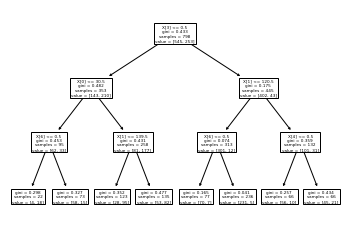

In [ ]:
tree.plot_tree(dt1)
plt.show()

In [ ]:
yhat_dt1 = dt1.predict(X_train)

In [ ]:
print(classification_report(Y_train, yhat_dt1))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       545
           1       0.70      0.77      0.73       253

    accuracy                           0.82       798
   macro avg       0.79      0.81      0.80       798
weighted avg       0.83      0.82      0.82       798



In [ ]:
predik_dt1 = dt1.predict(X_test)

In [ ]:
print(classification_report(Y_test, predik_dt1))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       130
           1       0.77      0.81      0.79        70

    accuracy                           0.85       200
   macro avg       0.83      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [ ]:
rf.fit(X_train, Y_train)

C:\Users\admin BASE\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
yhat_rf = rf.predict(X_train)

In [ ]:
yhat_rf_code = (yhat_rf >= 0.5).astype(int)

In [ ]:
print(classification_report(Y_train, yhat_rf_code))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       545
           1       0.98      0.96      0.97       253

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



In [ ]:
predik_rf = rf.predict(X_test)

In [ ]:
predik_rf_code = (predik_rf >= 0.5).astype(int)

In [ ]:
print(classification_report(Y_test, predik_rf_code))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       130
           1       0.57      0.49      0.52        70

    accuracy                           0.69       200
   macro avg       0.65      0.64      0.65       200
weighted avg       0.68      0.69      0.68       200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

C:\Users\admin BASE\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
yhat_knn = knn.predict(X_train)

In [ ]:
print(classification_report(Y_train, yhat_knn))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       545
           1       0.76      0.56      0.64       253

    accuracy                           0.80       798
   macro avg       0.79      0.74      0.75       798
weighted avg       0.80      0.80      0.80       798



##### 3 (Acc, Prec, Rec) = 0.82; 0.81; 0.77
##### 4 = 0.79; 0.82; 0.68
##### 5 = 0.80; 0.79; 0.74